<a href="https://colab.research.google.com/github/Suderland/Finance-Previsao-Preco-Acoes-D-10/blob/main/Finance_Previsao_Preco_Acoes_D%2B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prevendo os preços das ações até 10 dias a frente



Referência: [Link](https://www.youtube.com/watch?v=CvfAx3_nGME&list=PLgb2b2tu7he955vuNcgJS1M6aPaKcjyml)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importando a base de dados da bolsa de valores. Fonte:
# Como baixar dados históricos no Yahoo Finanças: https://br.ajuda.yahoo.com/kb/SLN2311.html
# Yahoo Finanças: https://br.financas.yahoo.com/
from google.colab import files
arquivo = files.upload()

Saving PETR4.SA.csv to PETR4.SA (1).csv


In [ ]:
df = pd.read_csv('PETR4.SA.csv', delimiter=',')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-28,18.950001,19.150000,18.780001,18.790001,14.644395,8969900.0
1,2012-05-29,18.910000,19.219999,18.700001,18.850000,14.691154,23202700.0
2,2012-05-30,18.559999,18.680000,18.320000,18.350000,14.301466,23451100.0
3,2012-05-31,18.480000,19.129999,18.080000,19.129999,14.909376,30378300.0
4,2012-06-01,18.530001,19.020000,18.389999,18.799999,14.652183,30593200.0
...,...,...,...,...,...,...,...
2309,2021-09-17,25.969999,26.020000,24.770000,24.930000,24.930000,131694100.0
2310,2021-09-20,24.080000,24.650000,23.790001,24.650000,24.650000,80260600.0
2311,2021-09-21,25.080000,25.290001,24.530001,25.209999,25.209999,64570200.0
2312,2021-09-22,25.530001,26.219999,25.520000,25.850000,25.850000,70231800.0


In [ ]:
# Verificando se tem colunas com valores nulos
df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
# Elinando os valores nulos
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-28,18.950001,19.150000,18.780001,18.790001,14.644395,8969900.0
1,2012-05-29,18.910000,19.219999,18.700001,18.850000,14.691154,23202700.0
2,2012-05-30,18.559999,18.680000,18.320000,18.350000,14.301466,23451100.0
3,2012-05-31,18.480000,19.129999,18.080000,19.129999,14.909376,30378300.0
4,2012-06-01,18.530001,19.020000,18.389999,18.799999,14.652183,30593200.0
...,...,...,...,...,...,...,...
2309,2021-09-17,25.969999,26.020000,24.770000,24.930000,24.930000,131694100.0
2310,2021-09-20,24.080000,24.650000,23.790001,24.650000,24.650000,80260600.0
2311,2021-09-21,25.080000,25.290001,24.530001,25.209999,25.209999,64570200.0
2312,2021-09-22,25.530001,26.219999,25.520000,25.850000,25.850000,70231800.0


In [ ]:
# Convertendo o campo data_pregao para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-28,18.950001,19.150000,18.780001,18.790001,14.644395,8969900.0
1,2012-05-29,18.910000,19.219999,18.700001,18.850000,14.691154,23202700.0
2,2012-05-30,18.559999,18.680000,18.320000,18.350000,14.301466,23451100.0
3,2012-05-31,18.480000,19.129999,18.080000,19.129999,14.909376,30378300.0
4,2012-06-01,18.530001,19.020000,18.389999,18.799999,14.652183,30593200.0
...,...,...,...,...,...,...,...
2309,2021-09-17,25.969999,26.020000,24.770000,24.930000,24.930000,131694100.0
2310,2021-09-20,24.080000,24.650000,23.790001,24.650000,24.650000,80260600.0
2311,2021-09-21,25.080000,25.290001,24.530001,25.209999,25.209999,64570200.0
2312,2021-09-22,25.530001,26.219999,25.520000,25.850000,25.850000,70231800.0


In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
# Renomeando as colunas de df para df_itau
df_petro = df.rename(columns = {'Date': 'data_pregao', 'Open': 'preco_abertura', 'High': 'preco_maximo', 'Low': 'preco_minimo', 'Close': 'preco_fechamento', 'Adj Close': 'qtd_total_negociado', 'Volume': 'volume_total_negociado'}, inplace = False)
df_petro.head()

,data_pregao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_total_negociado,volume_total_negociado
0,2012-05-28,18.950001,19.150000,18.780001,18.790001,14.644395,8969900.0
1,2012-05-29,18.910000,19.219999,18.700001,18.850000,14.691154,23202700.0
2,2012-05-30,18.559999,18.680000,18.320000,18.350000,14.301466,23451100.0
3,2012-05-31,18.480000,19.129999,18.080000,19.129999,14.909376,30378300.0
4,2012-06-01,18.530001,19.020000,18.389999,18.799999,14.652183,30593200.0


In [ ]:
# Selecionando as features
df_acao_fec = df_petro[['data_pregao', 'preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
0,2012-05-28,18.790001
1,2012-05-29,18.850000
2,2012-05-30,18.350000
3,2012-05-31,19.129999
4,2012-06-01,18.799999
...,...,...
2309,2021-09-17,24.930000
2310,2021-09-20,24.650000
2311,2021-09-21,25.209999
2312,2021-09-22,25.850000


In [ ]:
# Ajustando o índex
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))
df_acao_fec

,data_pregao,preco_fechamento
2012-05-28,2012-05-28,18.790001
2012-05-29,2012-05-29,18.850000
2012-05-30,2012-05-30,18.350000
2012-05-31,2012-05-31,19.129999
2012-06-01,2012-06-01,18.799999
...,...,...
2021-09-17,2021-09-17,24.930000
2021-09-20,2021-09-20,24.650000
2021-09-21,2021-09-21,25.209999
2021-09-22,2021-09-22,25.850000


In [ ]:
# Retirar coluna da data
df_acao_fec.drop('data_pregao', axis=1, inplace=True)
df_acao_fec

,preco_fechamento
2012-05-28,18.790001
2012-05-29,18.850000
2012-05-30,18.350000
2012-05-31,19.129999
2012-06-01,18.799999
...,...
2021-09-17,24.930000
2021-09-20,24.650000
2021-09-21,25.209999
2021-09-22,25.850000


Text(0.5, 0, 'data')

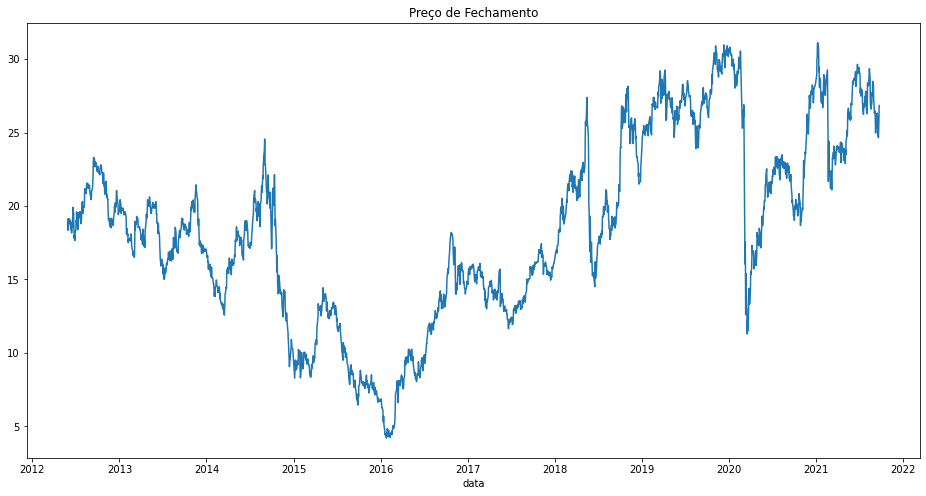

In [ ]:
# Plotar informação
plt.figure(figsize=(16,8))
plt.title('Preço de Fechamento')
plt.plot(df_acao_fec['preco_fechamento'])
plt.xlabel('data')

In [ ]:
# Quantidade de linhas, treino e teste
qtd_linhas = len(df_acao_fec)
qtd_linhas_treino = round(.70 * qtd_linhas)
qtd_linhas_teste = qtd_linhas - qtd_linhas_treino

info = (
    f'Linhas Treino= 0:{qtd_linhas_treino}'
    f'| Linhas Teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste}'
)
info

'Linhas Treino= 0:1617| Linhas Teste= 1617:2310'

In [ ]:
# Normalizando os dados (os valores das ações estão com variação numérica grande)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acao_fec)

In [ ]:
# Separa em Treino e Teste. Não usei o train test split para manter a ordem dos dados. 
# A ordem é importante em séries temporais. Em LSTMs também é importante a ordem. 
# Valores posteriores estão relacionados aos valores anteriores
train = df_scaled[:qtd_linhas_treino]
test = df_scaled[qtd_linhas_treino: qtd_linhas_treino+qtd_linhas_teste]
print( len(train), len(test))

1617 693


In [ ]:
# Converte um array de valores em uma matriz df, como a LSTM espera
def create_df(df, steps=1):
  dataX, dataY = [], []
  for i in range(len(df)-steps-1):
    a = df[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(df[i+steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
# Gerando dados de treino e teste
steps = 15
x_train, y_train = create_df(train, steps)
x_test, y_test = create_df(test, steps)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1601, 15)
(1601,)
(677, 15)
(677,)


In [ ]:
# Gerando os dados que o modelo espera
# X_train.shape[0] = 1604; X_train.shape[1] = 15 (dias para trás para prever pra frente) e 1 é qtd de features
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
# Montando a Rede Neural # return_sequences=True): as informações de saída da rede vão realimentar, retornar para a rede
model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 15, 35)            5180      
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 35)            9940      
_________________________________________________________________
lstm_5 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treinando o modelo 
validation = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=15, verbose=2)


Epoch 1/100
107/107 - 8s - loss: 0.1173 - val_loss: 0.2034
Epoch 2/100
107/107 - 2s - loss: 0.0514 - val_loss: 0.1041
Epoch 3/100
107/107 - 2s - loss: 0.0422 - val_loss: 0.0993
Epoch 4/100
107/107 - 2s - loss: 0.0350 - val_loss: 0.0610
Epoch 5/100
107/107 - 2s - loss: 0.0319 - val_loss: 0.1164
Epoch 6/100
107/107 - 2s - loss: 0.0277 - val_loss: 0.0918
Epoch 7/100
107/107 - 2s - loss: 0.0254 - val_loss: 0.0682
Epoch 8/100
107/107 - 2s - loss: 0.0247 - val_loss: 0.0507
Epoch 9/100
107/107 - 2s - loss: 0.0223 - val_loss: 0.0308
Epoch 10/100
107/107 - 2s - loss: 0.0205 - val_loss: 0.0281
Epoch 11/100
107/107 - 2s - loss: 0.0191 - val_loss: 0.0229
Epoch 12/100
107/107 - 2s - loss: 0.0179 - val_loss: 0.0230
Epoch 13/100
107/107 - 2s - loss: 0.0173 - val_loss: 0.0246
Epoch 14/100
107/107 - 2s - loss: 0.0171 - val_loss: 0.0295
Epoch 15/100
107/107 - 2s - loss: 0.0157 - val_loss: 0.0187
Epoch 16/100
107/107 - 2s - loss: 0.0145 - val_loss: 0.0307
Epoch 17/100
107/107 - 2s - loss: 0.0163 - val_lo

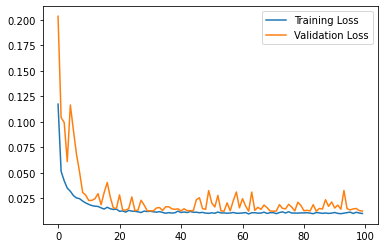

In [ ]:
plt.plot(validation.history['loss'], label='Training Loss')
plt.plot(validation.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
# Fazendo a previsão
prev = model.predict(x_test)
prev = scaler.inverse_transform(prev)
prev

array([[21.512934 ],
       [21.520554 ],
       [21.640043 ],
       [21.668934 ],
       [22.679375 ],
       [24.124498 ],
       [24.848022 ],
       [25.057053 ],
       [25.494593 ],
       [25.211405 ],
       [25.747746 ],
       [25.307041 ],
       [25.042208 ],
       [24.824883 ],
       [24.759478 ],
       [24.741076 ],
       [25.112488 ],
       [25.38891  ],
       [25.596397 ],
       [25.232576 ],
       [25.567884 ],
       [25.609724 ],
       [24.828121 ],
       [25.455034 ],
       [25.602636 ],
       [25.63587  ],
       [25.892193 ],
       [26.117199 ],
       [26.181885 ],
       [25.57951  ],
       [25.176294 ],
       [25.13976  ],
       [24.79237  ],
       [25.678625 ],
       [26.003077 ],
       [27.02399  ],
       [26.936583 ],
       [27.002943 ],
       [27.556519 ],
       [27.064192 ],
       [27.502842 ],
       [27.048582 ],
       [26.669659 ],
       [26.508516 ],
       [26.964634 ],
       [26.940994 ],
       [26.705463 ],
       [26.82

In [ ]:
# Previsão para os próximos 10 dias
lenght_test = len(test)
lenght_test

693

In [ ]:
# Pegar os últimos dias que são do tamanho do meu step
days_input_steps = lenght_test - steps
days_input_steps

678

In [ ]:
# Transforma em array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[1.29824915, 1.25536802, 1.27601433, 1.03937401, 1.12354824,
        1.0981372 , 1.23948612, 1.18389931, 1.25536802, 1.21883965,
        1.03302141, 0.98855208, 1.07749057, 1.1791349 , 1.33636572]])

In [ ]:
# Transformar numa lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[1.298249153692819,
 1.2553680209135187,
 1.27601433343269,
 1.0393740080950737,
 1.1235482423697465,
 1.0981372007227541,
 1.239486119884149,
 1.1838993074623425,
 1.2553680209135187,
 1.2188396485459678,
 1.0330214065023364,
 0.9885520836200996,
 1.0774905705655626,
 1.1791348959725423,
 1.3363657161633071]

In [ ]:
# Loop para prever os próximos 10 dias
pred_output=[]
i=0
n_future=10
while(i<n_future):
    if(len(list_output_steps) > steps):
      input_steps = np.array(list_output_steps[1:])
      print('{} dia. Valores de entrada -> {}'.format(i, input_steps))
      input_steps = input_steps.reshape(1,-1)
      input_steps = input_steps.reshape((1,steps,1))
      #print(input_steps)
      pred = model.predict(input_steps, verbose=0)
      print('{} dia. Valor previsto -> {}'.format(i, pred))
      list_output_steps.extend(pred[0].tolist())
      list_output_steps=list_output_steps[1:]
      #print(list_output_steps)
      pred_output.extend(pred.tolist())
      i=i+1
    else:
      input_steps = input_steps.reshape((1,steps,1))
      pred = model.predict(input_steps, verbose=0)
      print(pred[0])
      list_output_steps.extend(pred[0].tolist())
      print(len(list_output_steps))
      pred_output.extend(pred.tolist())
      i=i+1

print(pred_output)

[1.3330374]
16
1 dia. Valores de entrada -> [1.25536802 1.27601433 1.03937401 1.12354824 1.0981372  1.23948612
 1.18389931 1.25536802 1.21883965 1.03302141 0.98855208 1.07749057
 1.1791349  1.33636572 1.33303738]
1 dia. Valor previsto -> [[1.3435655]]
2 dia. Valores de entrada -> [1.27601433 1.03937401 1.12354824 1.0981372  1.23948612 1.18389931
 1.25536802 1.21883965 1.03302141 0.98855208 1.07749057 1.1791349
 1.33636572 1.33303738 1.34356546]
2 dia. Valor previsto -> [[1.3801897]]
3 dia. Valores de entrada -> [1.03937401 1.12354824 1.0981372  1.23948612 1.18389931 1.25536802
 1.21883965 1.03302141 0.98855208 1.07749057 1.1791349  1.33636572
 1.33303738 1.34356546 1.38018966]
3 dia. Valor previsto -> [[1.41024]]
4 dia. Valores de entrada -> [1.12354824 1.0981372  1.23948612 1.18389931 1.25536802 1.21883965
 1.03302141 0.98855208 1.07749057 1.1791349  1.33636572 1.33303738
 1.34356546 1.38018966 1.41024005]
4 dia. Valor previsto -> [[1.431739]]
5 dia. Valores de entrada -> [1.0981372  

In [ ]:
# Transforma a saída
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = list(prev)
list_output_prev = prev[0].tolist()
list_output_prev

[26.81904319040055,
 26.885333035655833,
 27.115936369122018,
 27.30514795571785,
 27.44051536855821,
 27.517917822616027,
 27.53716241411134,
 27.506580034303816,
 27.445095519785028,
 27.36824625672265]

In [ ]:
# Pegar as datas de previsão
dates = pd.to_datetime(df_petro['data_pregao'])
predict_dates = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods=10, freq='b').tolist()
predict_dates

[Timestamp('2021-09-24 00:00:00', freq='B'),
 Timestamp('2021-09-27 00:00:00', freq='B'),
 Timestamp('2021-09-28 00:00:00', freq='B'),
 Timestamp('2021-09-29 00:00:00', freq='B'),
 Timestamp('2021-09-30 00:00:00', freq='B'),
 Timestamp('2021-10-01 00:00:00', freq='B'),
 Timestamp('2021-10-04 00:00:00', freq='B'),
 Timestamp('2021-10-05 00:00:00', freq='B'),
 Timestamp('2021-10-06 00:00:00', freq='B'),
 Timestamp('2021-10-07 00:00:00', freq='B')]

In [ ]:
# Cria Dataframe de Previsão
forecast_dates = []
for i in predict_dates:
  forecast_dates.append(i.date())

df_forecast = pd.DataFrame({'data_pregao': np.array(forecast_dates), 'preco_fechamento': list_output_prev})
df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])

df_forecast = df_forecast.set_index(pd.DatetimeIndex(df_forecast['data_pregao'].values))
df_forecast.drop('data_pregao', axis=1, inplace=True)
df_forecast

,preco_fechamento
2021-09-24,26.819043
2021-09-27,26.885333
2021-09-28,27.115936
2021-09-29,27.305148
2021-09-30,27.440515
2021-10-01,27.517918
2021-10-04,27.537162
2021-10-05,27.506580
2021-10-06,27.445096
2021-10-07,27.368246


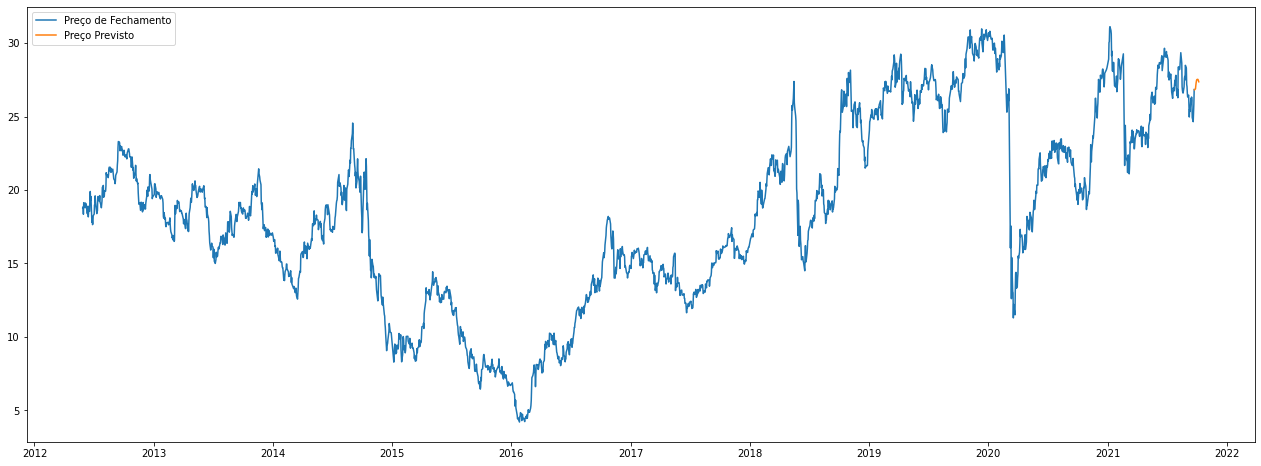

In [ ]:
#Plotar o Gráfico
plt.figure(figsize=(22,8))
plt.plot(df_acao_fec['preco_fechamento'])
plt.plot(df_forecast['preco_fechamento'])
plt.legend(['Preço de Fechamento', 'Preço Previsto'])
plt.show()